<a href="https://colab.research.google.com/github/08deepika/Netflix-Project/blob/main/NetfliX_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#       **NETFLIX** - ***Dataset Exploratory Data Analysis (EDA)***

---



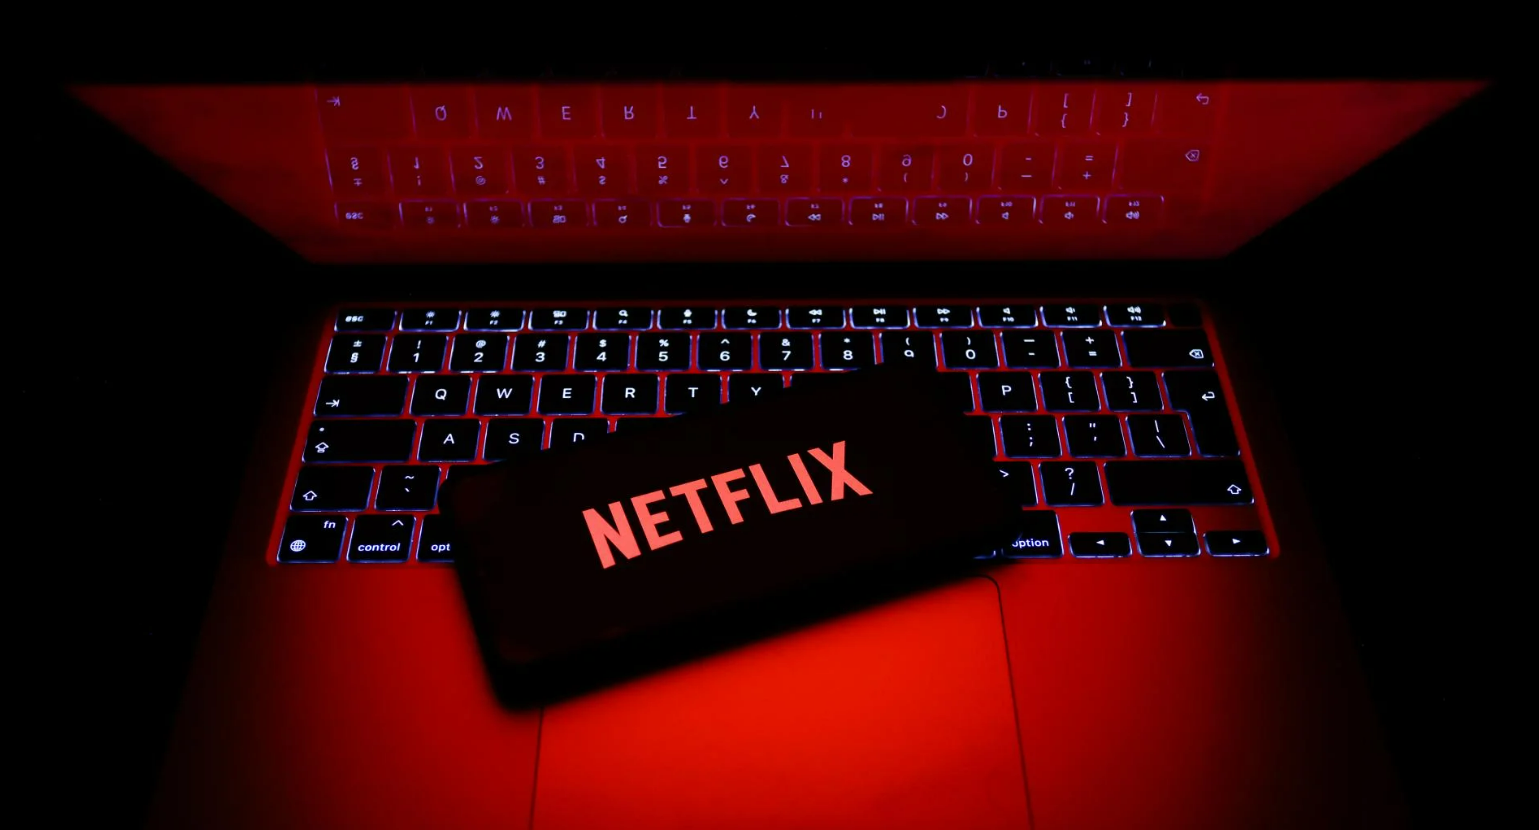

# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do

*   Exploratory Data Analysis.
*   Understanding what type content is available in different countries.
*   If Netflix has been increasingly focusing on TV rather than movies in  
     recent years.
*   Clustering similar content by matching text-based features.

#### **Define Your Business Objective?**

 Analyze Netflix data to identify trends in content type, genre, and viewership for strategic insights.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
netflix_df = pd.read_csv("/content/drive/MyDrive/Final Assignment Data.zip (Unzipped Files)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [4]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Dataset Rows & Columns count

In [5]:
netflix_df.shape

(7787, 12)

In [6]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Information

In [8]:
# data types
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# check for unique values
netflix_df.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


#### Duplicate Values

In [10]:
# check for duplicates
netflix_df[netflix_df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [11]:
# check for null values
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


#### Missing Values/Null Values

In [12]:
# treat the null values by most appropriate way
netflix_df.fillna({'director' : 'Unknown_Values'},inplace = True)
netflix_df.fillna({'cast': 'Unknowm_Values'}, inplace = True)
netflix_df.fillna({'country':'Unknown_Values'}, inplace = True)

In [13]:
netflix_df.dropna(subset=['date_added'], inplace = True)
netflix_df.dropna(subset = ['rating'], inplace = True)

In [14]:
netflix_df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


### What did you know about your dataset?

The dataset provided is related to Netflix, containing 7787 rows and 12 columns. It includes information about movies and TV shows available on the platform, such as title, genre, country, release year, and ratings. There are no missing or duplicate values in the dataset. The primary goal is to analyze viewing patterns, categorize content, and derive insights into popular genres, regions, and user engagement.

## ***2. Understanding Your Variables***

In [15]:
netflix_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [16]:
netflix_df['title'].unique()

array(['3%', '7:19', '23:59', ..., 'Zulu Man in Japan',
       "Zumbo's Just Desserts", "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"],
      dtype=object)

In [17]:
netflix_df['director'].unique()

array(['Unknown_Values', 'Jorge Michel Grau', 'Gilbert Chan', ...,
       'Josef Fares', 'Mozez Singh', 'Sam Dunn'], dtype=object)

In [18]:
netflix_df['cast'].unique()

array(['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi',
       'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato',
       'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim',
       ...,
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy',
       'Nasty C', 'Adriano Zumbo, Rachel Khoo'], dtype=object)

In [19]:
netflix_df['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'Unknown_Values', 'Norway, Iceland, United States',
       'United Kingdom', 'Japan', 'South Korea', 'Italy', 'Canada',
       'Indonesia', 'Romania', 'Spain', 'Iceland',
       'South Africa, Nigeria', 'France', 'United States, South Africa',
       'Portugal, Spain', 'Hong Kong, China, Singapore',
       'United States, Germany', 'South Africa, China, United States',
       'Argentina', 'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 

In [20]:
netflix_df['date_added'].unique()

array(['August 14, 2020', 'December 23, 2016', 'December 20, 2018', ...,
       'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [21]:
netflix_df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [22]:
netflix_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [23]:
netflix_df['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '113 min', '114 min', '130 min',
       '94 min', '140 min', '135 min', '82 min', '70 min', '121 min',
       '92 min', '164 min', '53 min', '83 min', '116 min', '86 min',
       '120 min', '96 min', '126 min', '129 min', '77 min', '137 min',
       '148 min', '28 min', '122 min', '176 min', '85 min', '22 min',
       '68 min', '111 min', '29 min', '142 min', '168 min', '21 min',
       '59 min', '20 min', '98 min', '108 min', '76 min', '26 min',
       '156 min', '30 min', '57 min', '150 min', '133 min', '115 min',
       '

In [24]:
netflix_df['listed_in'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [25]:
netflix_df['description'].unique()

array(['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
       'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
       "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
       ...,
       "In this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture.",
       'Dessert wizard Adriano Zumbo looks for the next “Willy Wonka” in this tense competition that finds skilled amateurs competing for a $100,000 prize.',
       'This documentary delves into the mystique behind the blues-rock trio and explores how the enigmatic band created their iconic look and sound.'],
      dtype=object)

In [26]:
# Dataset Describe
netflix_df.describe()

,release_year
count,7770.000000
mean,2013.935393
std,8.764357
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


**Here's a description for each variable in the Netflix dataset:**

1. **show_id:** Unique identifier for each show on Netflix.  
2. **type:** Type of content, indicating whether it's a "Movie" or "TV Show."  
3. **title:** Title of the movie or TV show.
4. **director:** Name(s) of the director(s) associated with the show (may be
  empty  for some entries).
5. **cast:** List of main cast members in the show.
6. **country:** Country or countries where the show was produced.
7. **date_added:** Date when the show was added to the Netflix library.
8. **release_year:** The year the show was originally released.
9. **rating:** Content rating, indicating the recommended viewer age group (e.g., PG, R, TV-MA).
10. **duration:** Length of the content, given in minutes for movies or seasons for TV shows.
11. **listed_in:** Categories or genres the show falls into (e.g., Comedy, Drama).
12. **description:** A brief summary of the show or movie’s plot.  





##**3.Data Analysis and Data Visualization.**

In [27]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown_Values,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##**Q1) Plot the count of different types of shows availble on netflix**

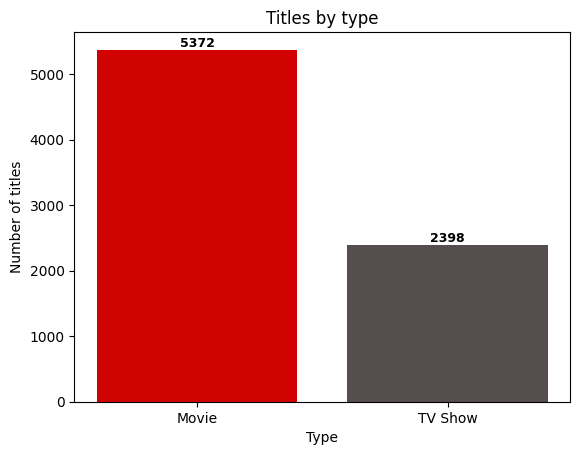

In [64]:
df_type = netflix_df.groupby('type')['show_id'].count().reset_index()
df_type.columns = ['Type','Number of titles']

value = df_type['Number of titles'].values

colors=['#D00202', '#564d4d']
plt.figure(figsize=(8, 6), facecolor='black')
plt.bar(df_type['Type'],height = df_type['Number of titles'], color = colors)
plt.xlabel('Type')
plt.ylabel('Number of titles')
plt.title('Titles by type')

for index,value in enumerate(value):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize= 9, fontweight='semibold', color = 'white')

plt.show()

**Observation from the graph:**\
**Here we can see that most of the titles that Netflix has available are movies (around 5372), while there are only 2398 TV Shows available.**

##**How those are distributed?**

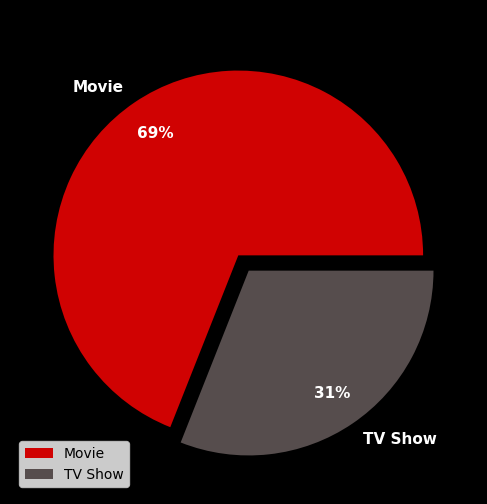

In [73]:
# How those are distributed?
total_titles = netflix_df['show_id'].count()


movies_count = netflix_df[netflix_df['type'] == 'Movie']['show_id'].count()
tv_shows_count = netflix_df[netflix_df['type'] == 'TV Show']['show_id'].count()

movies_percentage = round((movies_count / total_titles) * 100, 0)
tv_shows_percentage = round((tv_shows_count / total_titles) * 100, 0)


slices = [movies_percentage, tv_shows_percentage]
pie_labels = ["Movie", "TV Show"]
colors = ['#D00202', '#564d4d']  # Colors for each category
explode = (0.05, 0.05)  # Slight "explosion" to separate the slices

plt.figure(figsize=(8, 6), facecolor='black')
plt.pie(
    slices, labels=pie_labels, autopct='%1.0f%%', colors=colors,
    explode=explode, pctdistance=0.80, textprops={'color': 'white', 'weight': 'bold', 'fontsize': 11}
)

# Add a title with calculated percentages
plt.title(
    f'Netflix dataset contains {int(movies_percentage)}% Movies and {int(tv_shows_percentage)}% TV Shows'
)

# Add a legend for clarity
plt.legend(labels=pie_labels, loc='lower left')
plt.gca().set_facecolor('black')

# Show the chart
plt.show()


**Observations from the graph:**\
**Approximately 69% of the titles available on Netflix belong to the category of movies, while only around 31% fall under the TV shows category.**

##**Q2) Plot the Distribution of Release years**

In [61]:
netflix_df['release_year'].value_counts()

,count
release_year,
2018,1120
2017,1010
2019,996
2016,881
2020,868
...,...
1925,1
1964,1
1966,1


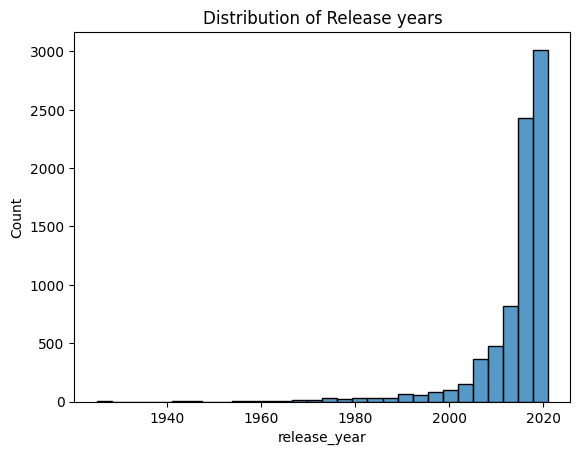

In [31]:
sns.histplot(netflix_df['release_year'], bins = 30)
plt.title("Distribution of Release years")
plt.show()

**observations from the graph**:

**1.Most numbers of releases are during the period 2000-2020.**\
**2.Highest numbers of releases are in the year 2018.**


##**Q3) Top 10 countries with highest content.**

In [33]:
country_data = netflix_df.country.value_counts().head(10)

In [34]:
country_data

,count
country,
United States,2546
India,923
Unknown_Values,505
United Kingdom,396
Japan,224
South Korea,183
Canada,177
Spain,134
France,115


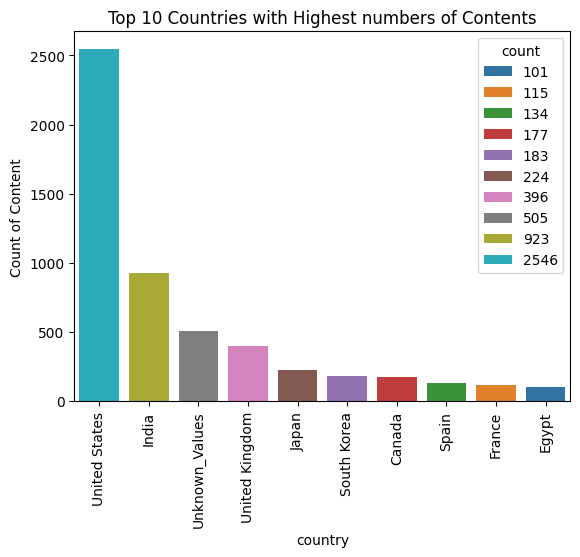

In [35]:
colors = sns.color_palette("tab10", 10)
sns.barplot(x=country_data.index, y=country_data.values, hue=country_data, palette = colors)
plt.xticks(rotation=90)
plt.ylabel("Count of Content")
plt.title("Top 10 Countries with Highest numbers of Contents")
plt.show()


**observations from the graph**:

**1.Netflix has a greater no: of contents from United States.**\
**2.India stands out in the second position.**\
**3."Unknown_Values" category ranks third, indicating missing data.**




##**Q4) list out TV shows from India?**

In [36]:
filtered_df = netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['country'] == 'India')]


In [37]:
show_titles = filtered_df['title']
print(show_titles)

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6248                  The Creative Indians
6398    The Golden Years with Javed Akhtar
6467                The House That Made Me
7292                            Typewriter
7703                       Yeh Meri Family
Name: title, Length: 71, dtype: object


In [38]:
tv_show_counts_by_year = filtered_df['release_year'].value_counts().sort_index()
print(tv_show_counts_by_year)

release_year
2009     1
2010     3
2011     1
2012     2
2013     3
2014     5
2015     9
2016     1
2017     3
2018    13
2019    14
2020    15
2021     1
Name: count, dtype: int64


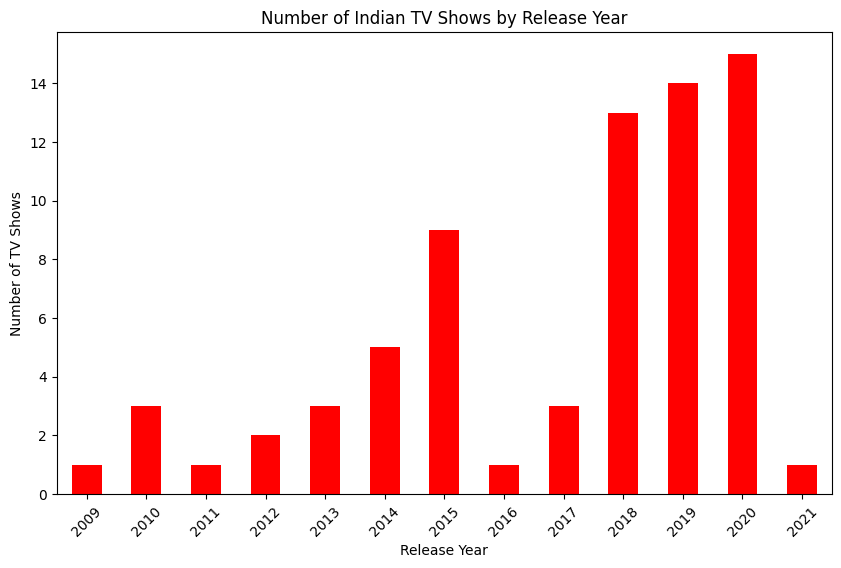

In [39]:
plt.figure(figsize=(10, 6))
tv_show_counts_by_year.plot(kind='bar', color='Red')
plt.title('Number of Indian TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)
plt.show()

**Observations from the graph:** \
**1.Rising Trend Over Time: The number of Indian TV shows has generally increased over the years, especially after 2015.** \
**2.Peak Years (2019-2020): 2019 and 2020 were the most productive years, with 14 shows each.**\
**3.2021 Drop: The number of releases dropped significantly in 2021, potentially due to production delays or market saturation.**

##**Q5) list out Movies from India?**

In [40]:
indian_movies = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['country'] == 'India')]

In [41]:
movie_titles = indian_movies['title']
print(movie_titles)

8                            706
9                           1920
18                        15-Aug
20          ​​Kuch Bheege Alfaaz
21                  ​Goli Soda 2
                  ...           
7764                        Zero
7769    Zindagi Na Milegi Dobara
7776                    Zokkomon
7780                         Zoo
7783                      Zubaan
Name: title, Length: 852, dtype: object


In [42]:
indian_movie_by_year = indian_movies['release_year'].value_counts().sort_index()

In [43]:
#print(indian_movie_by_year)

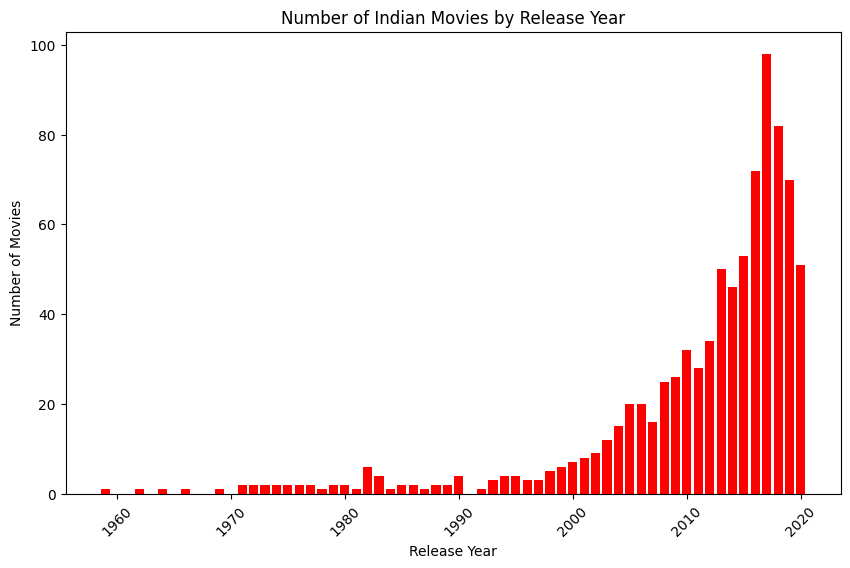

In [44]:
plt.figure(figsize=(10,6))
plt.bar(indian_movie_by_year.index, indian_movie_by_year.values, color = 'red')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Indian Movies by Release Year')
plt.xticks(rotation=45)
plt.show()

**Observations from the graph :**\
**1.Steady Increase (2000s): There is a gradual increase in the number of movies from around the early 2000s.** \
**2.Significant Growth (2010-2020): A sharp rise in movie releases is observed after 2010, with a peak around 2019.**\
**3.Decline After 2019: A noticeable drop in the number of movies released after 2019, possibly due to the COVID-19 pandemic affecting production.**

##**Q6) Top 10 Directors with the highest no: of contents**

In [45]:
top_10_director = netflix_df['director'].value_counts().head(10)

In [46]:
directors = top_10_director.index
content_count = top_10_director.values

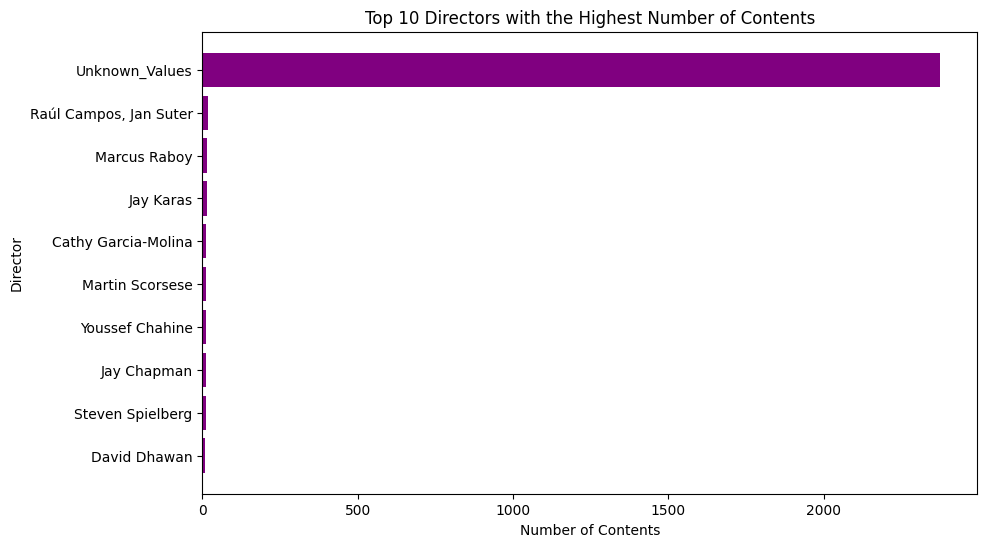

In [47]:
plt.figure(figsize=(10, 6))
plt.barh(directors, content_count, color='purple')  # Horizontal bar chart for readability
plt.xlabel('Number of Contents')
plt.ylabel('Director')
plt.title('Top 10 Directors with the Highest Number of Contents')
plt.gca().invert_yaxis()  # Invert y-axis to show the director with the highest count at the top
plt.show()

**Observations from the graph:**\
**1.High "Unknown Values": The majority of the entries have "Unknown Values" for the director, indicating missing or unrecorded data in the dataset.**\
**2.Among the directors with known values, Raúl Campos, Jan Suter, Marcus Raboy, and Jay Karas have relatively higher counts compared to others.**

##**Q7).What are the different Ratings definds by Netflix ?**

In [48]:
netflix_df['rating'].nunique()

14

In [49]:
netflix_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

**Q.7-a) How many Movies got the 'TV-14' rating in India?**

In [50]:
netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['rating'] == 'TV-14')].shape

(1272, 12)

In [51]:
netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['rating'] == 'TV-14') & (netflix_df['country'] == 'India')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",2018,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",2018,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug..."
22,s23,Movie,​Maj Rati ​​Keteki,Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,"September 15, 2018",2017,TV-14,117 min,"Dramas, International Movies",A successful writer returns to the town that l...
...,...,...,...,...,...,...,...,...,...,...,...,...
7754,s7755,Movie,Yuva,Mani Ratnam,"Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...",India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...
7763,s7764,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
7764,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",2018,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...
7769,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...


**Q7-b) How many TV Show got the 'R' rating, after year 2018?**

In [52]:
netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['rating'] == 'R') & (netflix_df['release_year'] > 2018)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


##**Q8) Which individual country has the highest no: of TV Shows?**

In [53]:
netflix_df[netflix_df['type']== 'TV Show']['country'].value_counts().head(1)

,count
country,
United States,699


##**Q9) What is the maximum duration of a Movie/Show on Netflix ?**

In [54]:
# Make explicit copies to avoid SettingWithCopyWarning
df_movies = netflix_df[netflix_df['type'] == 'Movie'].copy()
df_shows = netflix_df[netflix_df['type'] == 'TV Show'].copy()

# Extract numeric values for movie durations (in minutes)
df_movies['duration_min'] = df_movies['duration'].str.extract('(\d+)').astype(float)

# Extract numeric values for show durations (in seasons)
df_shows['duration_seasons'] = df_shows['duration'].str.extract('(\d+)').astype(float)

# Find maximum durations
max_movie_duration = df_movies['duration_min'].max()
max_show_duration = df_shows['duration_seasons'].max()

# Output the results
print(f"Maximum movie duration: {max_movie_duration} minutes")
print(f"Maximum TV show duration: {max_show_duration} seasons")


Maximum movie duration: 312.0 minutes
Maximum TV show duration: 16.0 seasons


##**Q10) Find all the instances Where**
**i). Category is 'Movie' and type is 'Dramas'.** \
**ii). Category is 'TV Show' and type is 'Kid's Show'.**

In [55]:
netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['listed_in'] == 'Dramas')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",2016,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",1988,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr..."
295,s296,Movie,Across Grace Alley,Ralph Macchio,"Ben Hyland, Marsha Mason, Karina Smirnoff, Col...",United States,"December 1, 2016",2013,TV-PG,24 min,Dramas,"A young boy, upset by his parents' divorce, be..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7415,s7416,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,"July 24, 2017",2015,PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join..."
7420,s7421,Movie,Villain,Philip Barantini,"Craig Fairbrass, George Russo, Robert Gleniste...",United Kingdom,"September 5, 2020",2020,R,97 min,Dramas,"Fresh out of prison, an ex-con tries to save h..."
7447,s7448,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",2018,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...
7463,s7464,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",2016,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...


In [56]:
#Category is 'TV Show' and type is 'Kid's Show'.
netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['listed_in'] == "Kids' TV")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
111,s112,TV Show,44 Cats,Unknown_Values,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,"October 1, 2020",2018,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada","July 1, 2020",2019,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...
434,s435,TV Show,Alphablocks,Unknown_Values,"Teresa Gallagher, David Holt, Lizzie Waterworth",United Kingdom,"May 25, 2020",2014,TV-Y,5 Seasons,Kids' TV,The letters of the alphabet come to life in Al...
598,s599,TV Show,Ask the StoryBots,Unknown_Values,"Judy Greer, Erin Fitzgerald, Fred Tatasciore, ...",United States,"August 2, 2019",2019,TV-Y,3 Seasons,Kids' TV,Five curious little creatures track down the a...
706,s707,TV Show,Bal Ganesh,Vijay S. Bhanushali,"Meghna Erande Joshi, Parminder Ghumman",Unknown_Values,"March 31, 2020",2019,TV-Y7,1 Season,Kids' TV,"Watch Ganesh destroy demons, disarm invaders a..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7666,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States","June 16, 2017",2017,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th..."
7715,s7716,TV Show,Yoko,Unknown_Values,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",Unknown_Values,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
7717,s7718,TV Show,YOM,Unknown_Values,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",Unknown_Values,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."
7756,s7757,TV Show,Z4,Unknown_Values,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,"February 22, 2019",2018,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...


##**Q11) Top 10 Genres with the Most Content on Netflix**

In [57]:
# Expand 'listed_in' into dummy columns and sum each genre
genre_counts = netflix_df['listed_in'].str.get_dummies(sep=', ').sum().nlargest(10)

print(genre_counts)

International Movies        2437
Dramas                      2105
Comedies                    1471
International TV Shows      1197
Documentaries                786
Action & Adventure           721
TV Dramas                    703
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
dtype: int64


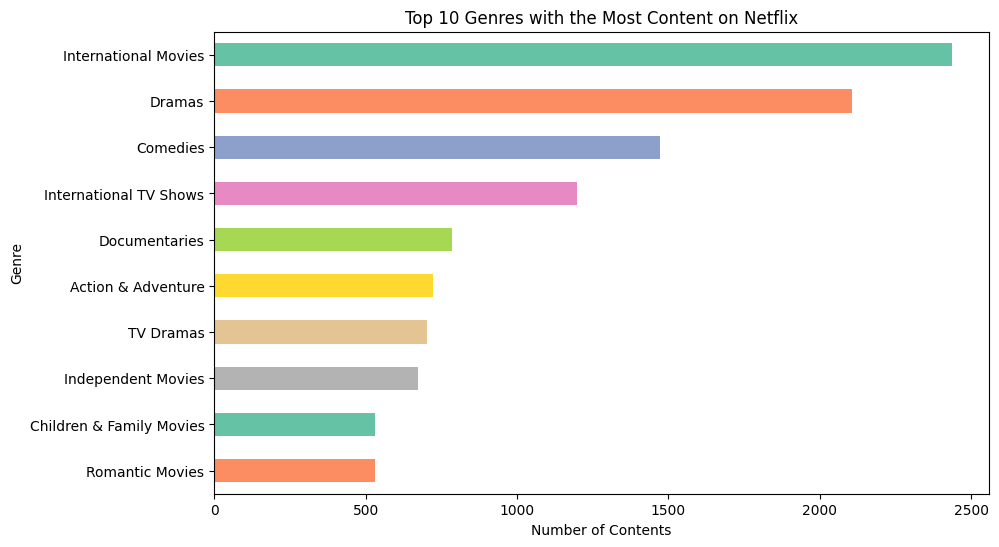

In [58]:
#Plot the Top 10 Genres
colors = sns.color_palette("Set2", n_colors=10)
genre_counts.plot(kind='barh', color=colors, figsize=(10, 6))
plt.xlabel('Number of Contents')
plt.ylabel('Genre')
plt.title('Top 10 Genres with the Most Content on Netflix')
plt.gca().invert_yaxis()  # Optional: Put the highest count at the top
plt.show()

**Observation from the graph:** \
**i).International Movies lead with the highest content on Netflix.** \
**ii)Dramas and Comedies are the next most popular genres.** \
**Overall, Netflix offers diverse genres to appeal to a broad audience base.**

##**Q12) Top 10 Genres for Movie and TV-Show?**

In [90]:
df_movies = netflix_df.loc[netflix_df['type']=='Movie']
#print(df_movies)
df_tvs = netflix_df.loc[netflix_df['type']=='TV Show']
#print(df_tvs)

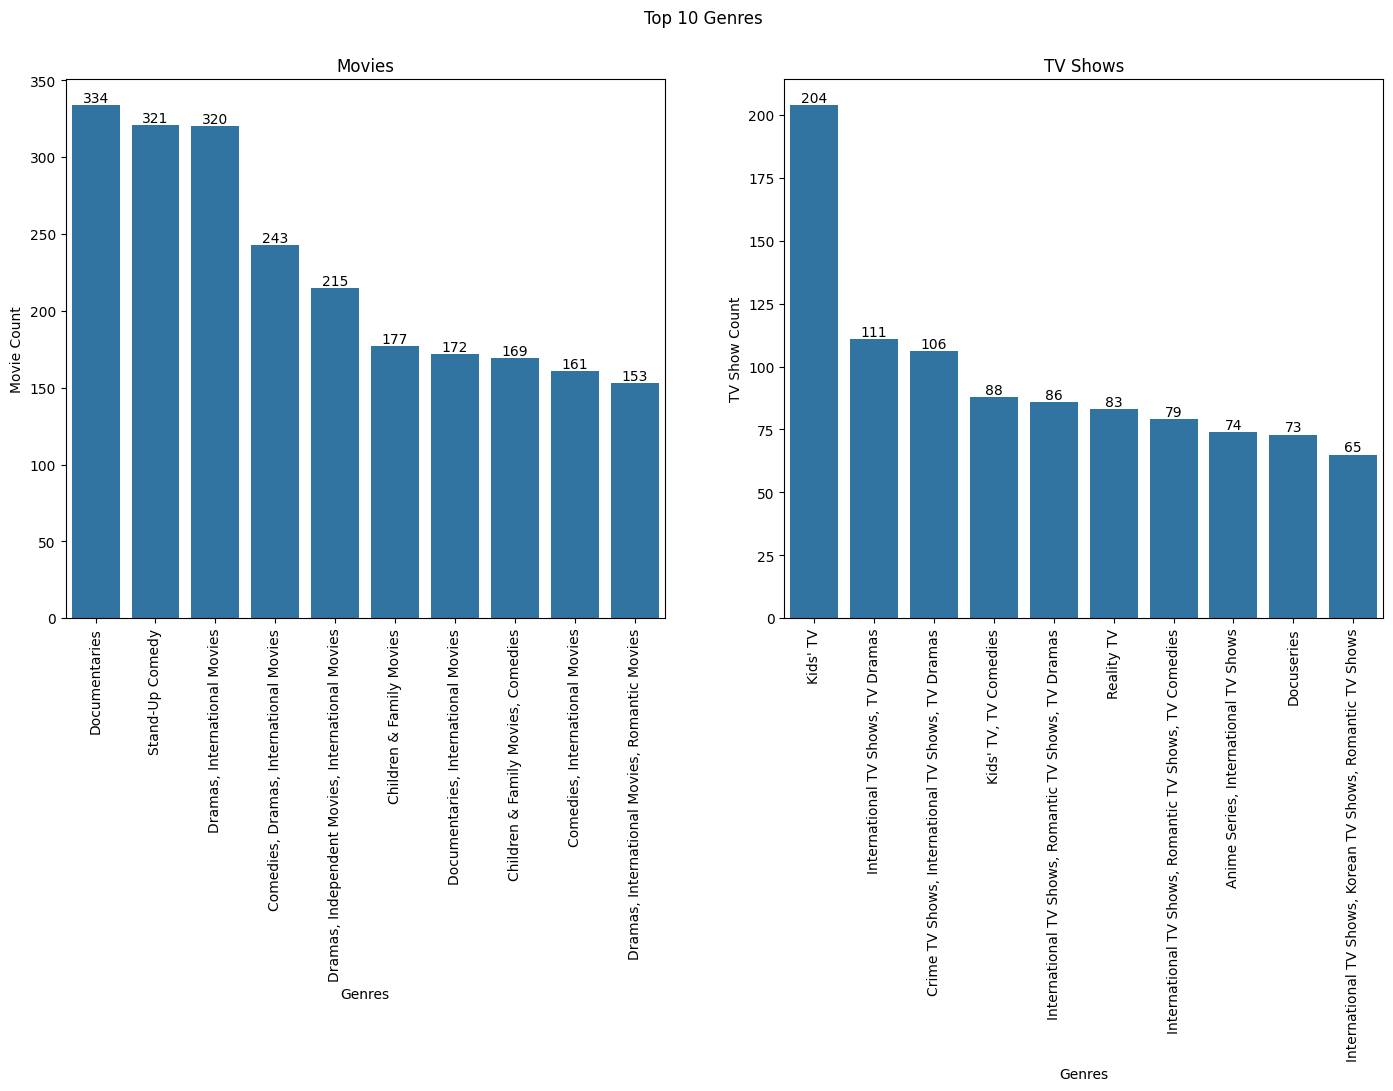

In [87]:
# The top 10 Genres
df_movies_temp = df_movies.drop_duplicates(subset = ['listed_in','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['listed_in','title'])

plt.figure(figsize = (17,7))
colors = sns.color_palette("tab10", 10)
plt.suptitle('Top 10 Genres')

plt.subplot(1,2,1)
label = sns.countplot(data= df_movies_temp, x='listed_in', order = df_movies_temp['listed_in'].value_counts().head(10).index,)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Movie Count')

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='listed_in', order = df_tvs_temp['listed_in'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('TV Show Count')

plt.show()


**Observation from the graph:** \
**From the above graph, it is inferred that most of the content fall under International followed by Drama and Comedy genre**

###**Conclusion :**
#####**The Netflix dataset analysis project provided valuable insights into the platform’s content distribution and trends. By examining the types of content (movies vs. TV shows), genres, release years, and other characteristics, we gained a deeper understanding of how Netflix’s library is structured. Key observations include the dominance of movies in the dataset, a diverse range of genres, and trends in release years. The analysis also highlighted the variety in the duration of movies and TV show seasons. This analysis can guide content recommendations, user engagement strategies, and platform improvements for both users and Netflix itself.**
